In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2

df_test = pd.read_csv('/home/yandex/igor/data_eyes/csv/altyn_frames_podium_const_sep_norm.csv', sep=';')
#df_test = df_test[df_test.lndm_ok!= 0]
#df_test = df_test[df_test.lndm_ok!= 2]
#df_test = df_test[df_test.const_left!= -1]
#df_test = df_test[df_test.const_right!= -1]
#df_test = df_test[df_test.const_left!= float('inf')]
#df_test = df_test[df_test.const_right!= float('inf')]
df_test

,file,blink,bounding_box,bounding_box_center_x,bounding_box_center_x_deviation,bounding_box_center_y,bounding_box_center_y_deviation,bounding_box_height,bounding_box_height_relative,bounding_box_width,...,light_lighting,num_of_all_faces,object,sharpness,smile,up_down,width,const_left,const_right,person_id
0,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000002,"14,26,98,110",56,0.000000,68,0.107143,84,0.750000,84,...,0.138742,1,0.000339,0.6875,2.917881e-04,0.214286,112,0.903226,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
1,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"13,27,97,111",55,-0.008929,69,0.116071,84,0.750000,84,...,0.116140,1,0.000401,0.7500,3.369366e-04,0.214286,112,0.935484,0.852941,445493eb-d0fa-4670-b785-bb3d2e10082d
2,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.088437,1,0.000548,0.6875,2.373873e-04,0.228916,112,1.000000,0.911765,445493eb-d0fa-4670-b785-bb3d2e10082d
3,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000011,"13,28,95,110",54,-0.017857,69,0.116071,82,0.732143,82,...,0.182376,1,0.002567,0.6875,3.690342e-04,0.219512,112,0.838710,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
4,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000007,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.082775,1,0.000317,0.6875,2.285370e-04,0.228916,112,0.838710,0.823529,445493eb-d0fa-4670-b785-bb3d2e10082d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319690,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000172,"12,23,102,112",57,0.008929,67,0.102679,89,0.794643,90,...,0.020605,1,0.000040,1.0000,1.551610e-06,-0.168539,112,0.250000,0.260000,bdc8b735-3bda-486c-a35b-97354b62e925
3319691,/mnt/data/frames/altyn_original_fps_igor_origa...,0.001776,"10,21,101,112",55,-0.004464,66,0.093750,91,0.812500,91,...,0.027885,1,0.000046,1.0000,6.048799e-07,-0.142857,112,0.220000,0.270000,bdc8b735-3bda-486c-a35b-97354b62e925
3319692,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000220,"12,21,101,110",56,0.004464,65,0.084821,89,0.794643,89,...,0.079881,1,0.000019,1.0000,2.153785e-06,-0.191011,112,0.240000,0.240000,bdc8b735-3bda-486c-a35b-97354b62e925
3319693,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000194,"12,22,104,112",58,0.017857,67,0.098214,90,0.803571,92,...,0.018007,1,0.000033,1.0000,2.645185e-06,-0.155556,112,0.220000,0.230000,bdc8b735-3bda-486c-a35b-97354b62e925


In [6]:
"""
eyes_left/eyes_right

0	Глаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)
-6	Оба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)
-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
-4	Один глаз полностью закрыт объектом или тенью (невозможно оценить открытость)
-3	Один глаз (веки) закрыт, другой открыт
-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
-1	Нависшие веки у пожилых
1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)

"""

'\neyes_left/eyes_right\n\n0\tГлаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)\n-6\tОба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)\n-5\tГлаза (веки) полностью закрыты, радужная оболочка не видна\n-4\tОдин глаз полностью закрыт объектом или тенью (невозможно оценить открытость)\n-3\tОдин глаз (веки) закрыт, другой открыт\n-2\tЕсть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)\n-1\tНависшие веки у пожилых\n1\tГлаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие\n2\tГлаза выпучены (могут идти в комплекте с поднятыми бровями)\n\n'

In [7]:
"""
emotion (выражение лица)

0	Губы ровно
-1	Рот закрыт объектом и губы не видно (например, медицинской маской), невозможно оценить 
1	Рот закрыт, уголок/уголки опущены или один уголок приподнят (хмурое или недовольное лицо)
2	Рот закрыт, уголки приподняты (улыбка с закрытым ртом)
3	Рот открыт, уголки приподняты (улыбка с открытым ртом)
4	Рот открыт (может идти в компекте с приподнятыми бровями или высунутым языком)

"""

'\nemotion (выражение лица)\n\n0\tГубы ровно\n-1\tРот закрыт объектом и губы не видно (например, медицинской маской), невозможно оценить \n1\tРот закрыт, уголок/уголки опущены или один уголок приподнят (хмурое или недовольное лицо)\n2\tРот закрыт, уголки приподняты (улыбка с закрытым ртом)\n3\tРот открыт, уголки приподняты (улыбка с открытым ртом)\n4\tРот открыт (может идти в компекте с приподнятыми бровями или высунутым языком)\n\n'

In [8]:
"""
headwear (головной убор)

0	Нет головного убора
1	Есть допустимый (религиозный) головной убор (например, хиджаб или женский платок на голову, тюрбан, чалма)
2	Есть головной убор (религиозным не является). Например, шапка, капюшон, наушники и другие.

"""

'\nheadwear (головной убор)\n\n0\tНет головного убора\n1\tЕсть допустимый (религиозный) головной убор (например, хиджаб или женский платок на голову, тюрбан, чалма)\n2\tЕсть головной убор (религиозным не является). Например, шапка, капюшон, наушники и другие.\n\n'

In [9]:
"""
object (Объект на лице)

################################################################################################################
Зоны без основных контрольных точек		
1 - 	Внешняя часть лица: лоб, подбородок, уши (только для наушников) и контур лица (узкая полоса).	
2 - 	Внутренняя часть лица: щеки, скулы, область вокруг глаз, область вокруг губ.	
Зоны с основными контрольными точками		
3 - 	Рот	
4 - 	Нос	
5 - 	Глаза (по стандарту + еще небольшая полоса над краем верхнего века)	
		
Верхняя граница между 1 и 2 проходит по бровям (брови можно отнести к 1, если они не нависают прямо над глазами)		
Нижняя граница между 1 и 2 проходит примерно по середине подбородка		
#################################################################################################################

0	Зоны 1-5 не содержат никаких объектов	
1	Объект попадает в зону 1	
2	Объект попадает в зону 2	
3	Объект попадает в зону 3	
4	Объект попадает в зону 4	
5	Объект попадает в зону 5

"""

'\nobject (Объект на лице)\n\n################################################################################################################\nЗоны без основных контрольных точек\t\t\n1 - \tВнешняя часть лица: лоб, подбородок, уши (только для наушников) и контур лица (узкая полоса).\t\n2 - \tВнутренняя часть лица: щеки, скулы, область вокруг глаз, область вокруг губ.\t\nЗоны с основными контрольными точками\t\t\n3 - \tРот\t\n4 - \tНос\t\n5 - \tГлаза (по стандарту + еще небольшая полоса над краем верхнего века)\t\n\t\t\nВерхняя граница между 1 и 2 проходит по бровям (брови можно отнести к 1, если они не нависают прямо над глазами)\t\t\nНижняя граница между 1 и 2 проходит примерно по середине подбородка\t\t\n#################################################################################################################\n\n0\tЗоны 1-5 не содержат никаких объектов\t\n1\tОбъект попадает в зону 1\t\n2\tОбъект попадает в зону 2\t\n3\tОбъект попадает в зону 3\t\n4\tОбъект попадает в зону 4\t

In [10]:
"""
low_resolution

0	Изображение хорошего разрешения (пиксели не видны)
1	Изображение зернистое, пиксели видны, но не сильно заметны	
2	Пиксельное изображение (пиксели сильно заметны)

"""

'\nlow_resolution\n\n0\tИзображение хорошего разрешения (пиксели не видны)\n1\tИзображение зернистое, пиксели видны, но не сильно заметны\t\n2\tПиксельное изображение (пиксели сильно заметны)\n\n'

In [11]:
"""
camera (дефект камеры)

0	Нет никаких дефектов
1	Изображение вытянуто в ширину или высоту (нарушены пропорции)
2	Есть дефект камеры, но он не закрывает лицо (например, полоса внизу, трещинка в углу и т.п.	
3	Небольшие полосы или другие артефакты, закрывающие лицо
4	Широкие полосы или другие артефакты, разбитый объектив (лицо трудно/невозможно рассмотреть), закрыта большая часть кадра.

"""

'\ncamera (дефект камеры)\n\n0\tНет никаких дефектов\n1\tИзображение вытянуто в ширину или высоту (нарушены пропорции)\n2\tЕсть дефект камеры, но он не закрывает лицо (например, полоса внизу, трещинка в углу и т.п.\t\n3\tНебольшие полосы или другие артефакты, закрывающие лицо\n4\tШирокие полосы или другие артефакты, разбитый объектив (лицо трудно/невозможно рассмотреть), закрыта большая часть кадра.\n\n'

In [12]:
"""
blur (размытость)

0	Нет размытости, четкое изображение	
1	Изображение размытое, мутное, не в фокусе	
2	Размыта часть изображения, попадающая на лицо (как будто капнули воду на акварельную картину). Например, из-за жирного пятна на объективе.
3	Кадр четкий, но есть размытый объект, заходящий на лицо (например, рука, голова или другой объект в движении)
4	Кадр нечеткий, как будто двоится, размытость из-за движения объекта или камеры.	
5	На изображении есть "туман", белесая пелена из-за яркого освещения или замыленность	
6	Изображение подозрительное, но точно определить тип нечеткости не удается.

"""

'\nblur (размытость)\n\n0\tНет размытости, четкое изображение\t\n1\tИзображение размытое, мутное, не в фокусе\t\n2\tРазмыта часть изображения, попадающая на лицо (как будто капнули воду на акварельную картину). Например, из-за жирного пятна на объективе.\n3\tКадр четкий, но есть размытый объект, заходящий на лицо (например, рука, голова или другой объект в движении)\n4\tКадр нечеткий, как будто двоится, размытость из-за движения объекта или камеры.\t\n5\tНа изображении есть "туман", белесая пелена из-за яркого освещения или замыленность\t\n6\tИзображение подозрительное, но точно определить тип нечеткости не удается.\n\n'

blink


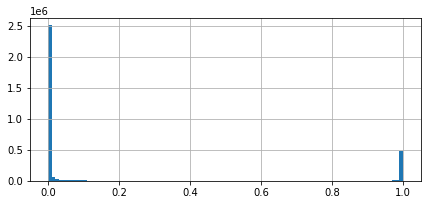



confidence


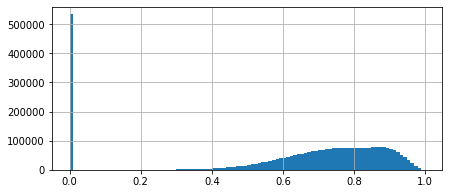



left_right


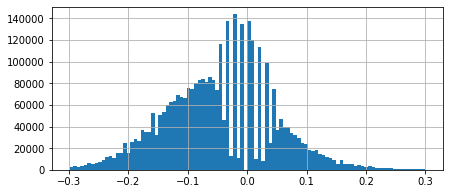



object


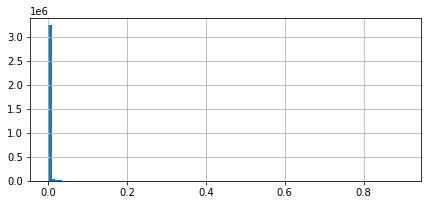



sharpness


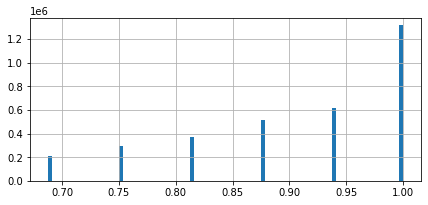



smile


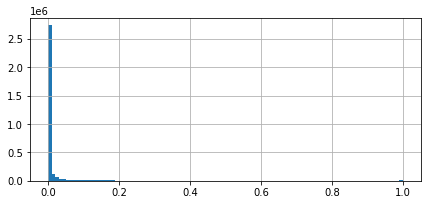



up_down


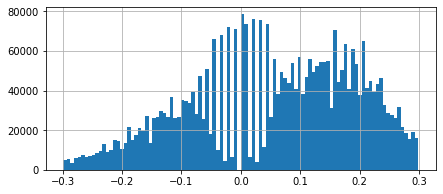

In [2]:
skip_list = ['file', 'basename', 'filename', 'const_left', 'const_right', 'bounding_box', 'bounding_box_center_x', 'bounding_box_center_x_deviation', 
'bounding_box_center_y', 'bounding_box_center_y_deviation', 'facial_landmarks', 'bounding_box_width_relative', 'bounding_box_width', 'bounding_box_height_relative', 'bounding_box_height']
interested_list = ['sharpness', 'object', 'confidence', 'blink', 'left_right', 'up_down', 'smile']
for i in list(df_test.columns.values):
    if i in interested_list:
        print(i)
        df_test[i].hist(bins = 100, figsize = (7, 3))
        plt.show()
        print('\n')


In [20]:
df_test = df_test[df_test.const_left!= -1]
df_test = df_test[df_test.const_right!= -1]
df_test = df_test[df_test.const_left!= float('inf')]
df_test = df_test[df_test.const_right!= float('inf')]

df_test = df_test[df_test.const_left<= 0.31]#0.4]
df_test = df_test[df_test.const_right<= 0.31]#0.4]

In [15]:
#4421814 
df_test

,file,blink,bounding_box,bounding_box_center_x,bounding_box_center_x_deviation,bounding_box_center_y,bounding_box_center_y_deviation,bounding_box_height,bounding_box_height_relative,bounding_box_width,...,light_lighting,num_of_all_faces,object,sharpness,smile,up_down,width,const_left,const_right,person_id
0,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000002,"14,26,98,110",56,0.000000,68,0.107143,84,0.750000,84,...,0.138742,1,0.000339,0.6875,2.917881e-04,0.214286,112,0.903226,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
1,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"13,27,97,111",55,-0.008929,69,0.116071,84,0.750000,84,...,0.116140,1,0.000401,0.7500,3.369366e-04,0.214286,112,0.935484,0.852941,445493eb-d0fa-4670-b785-bb3d2e10082d
2,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.088437,1,0.000548,0.6875,2.373873e-04,0.228916,112,1.000000,0.911765,445493eb-d0fa-4670-b785-bb3d2e10082d
3,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000011,"13,28,95,110",54,-0.017857,69,0.116071,82,0.732143,82,...,0.182376,1,0.002567,0.6875,3.690342e-04,0.219512,112,0.838710,0.764706,445493eb-d0fa-4670-b785-bb3d2e10082d
4,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000007,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.082775,1,0.000317,0.6875,2.285370e-04,0.228916,112,0.838710,0.823529,445493eb-d0fa-4670-b785-bb3d2e10082d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319690,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000172,"12,23,102,112",57,0.008929,67,0.102679,89,0.794643,90,...,0.020605,1,0.000040,1.0000,1.551610e-06,-0.168539,112,0.250000,0.260000,bdc8b735-3bda-486c-a35b-97354b62e925
3319691,/mnt/data/frames/altyn_original_fps_igor_origa...,0.001776,"10,21,101,112",55,-0.004464,66,0.093750,91,0.812500,91,...,0.027885,1,0.000046,1.0000,6.048799e-07,-0.142857,112,0.220000,0.270000,bdc8b735-3bda-486c-a35b-97354b62e925
3319692,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000220,"12,21,101,110",56,0.004464,65,0.084821,89,0.794643,89,...,0.079881,1,0.000019,1.0000,2.153785e-06,-0.191011,112,0.240000,0.240000,bdc8b735-3bda-486c-a35b-97354b62e925
3319693,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000194,"12,22,104,112",58,0.017857,67,0.098214,90,0.803571,92,...,0.018007,1,0.000033,1.0000,2.645185e-06,-0.155556,112,0.220000,0.230000,bdc8b735-3bda-486c-a35b-97354b62e925


<AxesSubplot:>

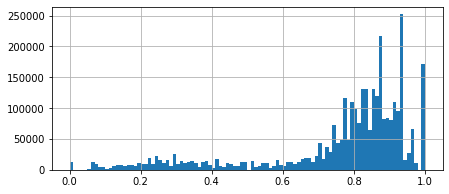

In [3]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

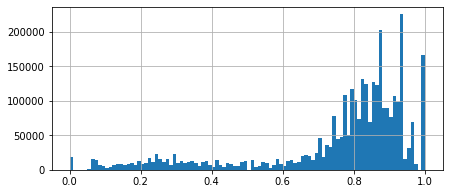

In [4]:
df_test['const_right'].hist(bins = 100, figsize = (7, 3))

In [24]:
def select_data1(df_test, age=True, fairface_path=True):
    """
    light_exposure:
    <0.15 - очень темные
    >0.9 - очень светлые
    примерно [0.4, 0.6] - норма
    light_background
    >0.95 - яркий фон
    примерно [0.4, 0.6] - норма
    light_lighting
    >0.95 - сильно неравномерно освещено лицо
    примерно [0, 0.5] - норма
    face_brightness
    <0.3 - темные лица
    sharpness
    =0 - сильно размыто
    примерно >0.625 нормально
    left_right и up_down по модулю меньше 0.3
    object<0.9
    """

    def append_ext(fn):
        img_path = '/home/yandex/igor/data_eyes/races_dataset/fairface_cropped'
        return img_path + '/' + fn.split('/')[-2] + '/' + fn.split('/')[-1]
        
    if fairface_path:
        df_test['filename']=df_test['file'].apply(append_ext)
        df_test_new = df_test.copy()#pd.concat([df_test[df_test.race=='East Asian'], df_test[df_test.race=='Southeast Asian']], axis=0)
        df_test_new.rename(columns={'horiz_angle': 'left_right', 'vert_angle': 'up_down'}, inplace=True)

    else:
        df_test_new = df_test#[df_test.genome=='asian']
    two_faces, podium, normalize = True, True, True
    
    
    if age:
        df_test_new = df_test_new[df_test_new.age!='more than 70']
        df_test_new = df_test_new[df_test_new.age!='0-2']
        df_test_new = df_test_new[df_test_new.age!='3-9']
        df_test_new = df_test_new[df_test_new.age!='50-59']
        df_test_new = df_test_new[df_test_new.age!='60-69']

    if two_faces:
        df_test_new = df_test_new[df_test_new.const_left!=-1]
        df_test_new = df_test_new[df_test_new.const_right!=-1]

        df_test_new = df_test_new[df_test_new.const_left!=float('inf')]
        df_test_new = df_test_new[df_test_new.const_right!=float('inf')]

    if podium:
        df_test_new = df_test_new[df_test_new.light_exposure>0.15]
        df_test_new = df_test_new[df_test_new.light_exposure<0.9]
        df_test_new = df_test_new[df_test_new.light_background<0.95]
        df_test_new = df_test_new[df_test_new.light_lighting<0.95]
        df_test_new = df_test_new[df_test_new.object<0.9]
        df_test_new = df_test_new[df_test_new.face_brightness>0.3]
        df_test_new = df_test_new[df_test_new.sharpness>0.625]#0.625]
        
        df_test_new = df_test_new[abs(df_test_new.left_right)<0.3]
        df_test_new = df_test_new[abs(df_test_new.up_down)<0.3]

        if not fairface_path:
            for index, row in df_test_new.iterrows():
                blink = row['blink']
                #const_left = row['const_left']
                #const_right = row['const_right']
                if blink > 0.95:
                    df_test_new.loc[index, 'const_left'] = 0
                    df_test_new.loc[index, 'const_right'] = 0


    if normalize:
        df_test_new['const_left']=df_test_new['const_left']-min(df_test_new.const_left)
        df_test_new['const_right']=df_test_new['const_right']-min(df_test_new.const_right)

        df_test_new['const_left']=(df_test_new['const_left']/max(df_test_new.const_left)*9).astype('int')
        df_test_new['const_right']=(df_test_new['const_right']/max(df_test_new.const_right)*9).astype('int')
    
    return df_test_new

df_test = select_data1(df_test, age=False, fairface_path=False)
df_test


,file,blink,bounding_box,bounding_box_center_x,bounding_box_center_x_deviation,bounding_box_center_y,bounding_box_center_y_deviation,bounding_box_height,bounding_box_height_relative,bounding_box_width,...,light_exposure,light_lighting,num_of_all_faces,object,sharpness,smile,up_down,width,const_left,const_right
1,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000002,"14,26,98,110",56,0.000000,68,0.107143,84,0.750000,84,...,0.496488,0.138742,1,0.000339,0.6875,2.917881e-04,0.214286,112,8,7
2,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"13,27,97,111",55,-0.008929,69,0.116071,84,0.750000,84,...,0.495625,0.116140,1,0.000401,0.7500,3.369366e-04,0.214286,112,8,8
3,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000003,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.493907,0.088437,1,0.000548,0.6875,2.373873e-04,0.228916,112,9,9
5,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000011,"13,28,95,110",54,-0.017857,69,0.116071,82,0.732143,82,...,0.493497,0.182376,1,0.002567,0.6875,3.690342e-04,0.219512,112,7,7
6,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000007,"14,26,97,109",55,-0.004464,67,0.102679,83,0.741071,83,...,0.493608,0.082775,1,0.000317,0.6875,2.285370e-04,0.228916,112,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432104,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000172,"12,23,102,112",57,0.008929,67,0.102679,89,0.794643,90,...,0.499736,0.020605,1,0.000040,1.0000,1.551610e-06,-0.168539,112,7,7
4432105,/mnt/data/frames/altyn_original_fps_igor_origa...,0.001776,"10,21,101,112",55,-0.004464,66,0.093750,91,0.812500,91,...,0.502961,0.027885,1,0.000046,1.0000,6.048799e-07,-0.142857,112,6,7
4432106,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000220,"12,21,101,110",56,0.004464,65,0.084821,89,0.794643,89,...,0.502154,0.079881,1,0.000019,1.0000,2.153785e-06,-0.191011,112,6,6
4432107,/mnt/data/frames/altyn_original_fps_igor_origa...,0.000194,"12,22,104,112",58,0.017857,67,0.098214,90,0.803571,92,...,0.500857,0.018007,1,0.000033,1.0000,2.645185e-06,-0.155556,112,6,6


<AxesSubplot:>

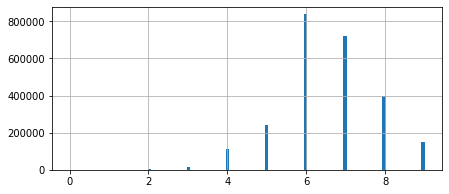

In [35]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

In [17]:
df_test[df_test.const_left >= 0.3]['const_left'].value_counts()

0.870968    123774
0.935484    119112
0.827586     83396
0.931034     82135
0.774194     79294
             ...  
0.500000         1
0.400000         1
0.439024         1
0.414634         1
0.500000         1
Name: const_left, Length: 616, dtype: int64

<AxesSubplot:>

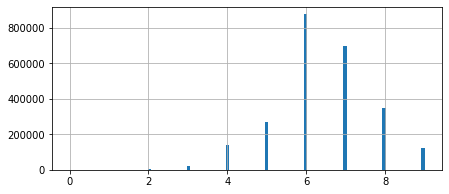

In [34]:
df_test['const_right'].hist(bins = 100, figsize = (7, 3))

In [33]:
df_test['const_right'].value_counts()

6    875938
7    700034
8    345888
5    266918
4    140826
9    122054
3     20260
2      5081
1       241
0        33
Name: const_right, dtype: int64

In [32]:
df_test = df_test[df_test['confidence']>=0.5]

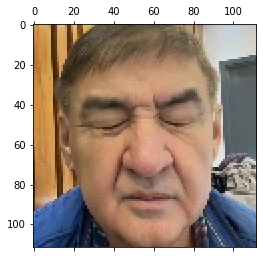

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/988e707e-cff1-456f-b462-3e81f221136d/0093.jpg
confidence =  0.0
blink =  0.99999964
const_left =  0.0
const_right =  0.1724137931028538




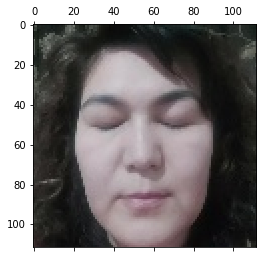

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/97db696a-0739-4f82-9bbb-5638cade9424/0039.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.0833333333329861




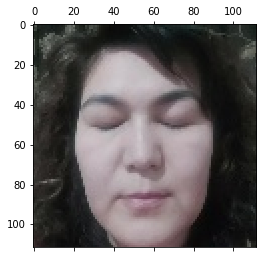

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/97db696a-0739-4f82-9bbb-5638cade9424/0040.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.0833333333329861




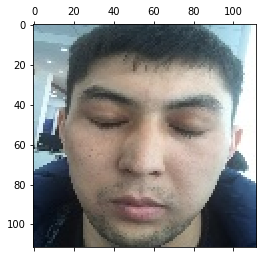

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/f2f8d811-f90c-448e-8028-54b42563b263/0063.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.0666666666664444




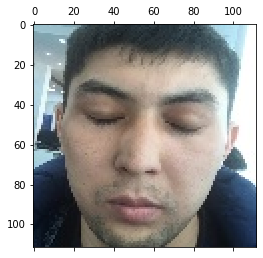

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/f2f8d811-f90c-448e-8028-54b42563b263/0053.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.2333333333325556




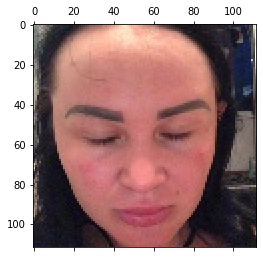

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/9f64bcbb-b4e5-4d4b-9a79-b96e7c58850f/0046.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.2258064516121748




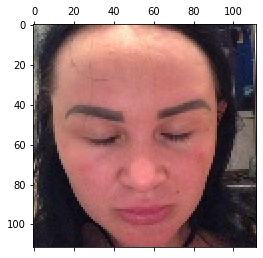

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/9f64bcbb-b4e5-4d4b-9a79-b96e7c58850f/0050.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.0645161290320499




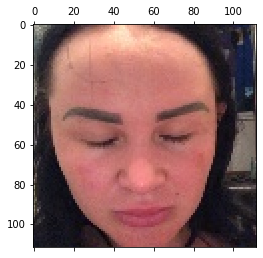

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/9f64bcbb-b4e5-4d4b-9a79-b96e7c58850f/0075.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.2580645161281998




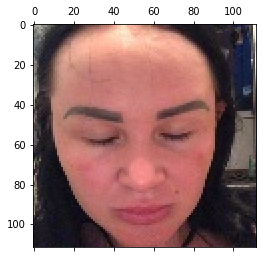

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/9f64bcbb-b4e5-4d4b-9a79-b96e7c58850f/0056.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.2580645161281998




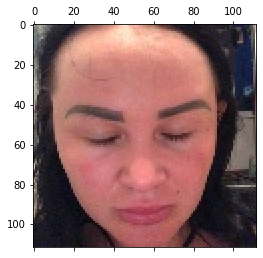

/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/9f64bcbb-b4e5-4d4b-9a79-b96e7c58850f/0047.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0
const_right =  0.2258064516121748




In [19]:
for i,row in df_test[df_test['const_left']==0][:10].iterrows():

    file = row['file']
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.show()
    print(row['file'])
    #print('object =', row['object'])
    #print('low_resolution =', row['low_resolution'])
    print('confidence = ', row['confidence'])
    print('blink = ', row['blink'])
    print('const_left = ', row['const_left'])
    print('const_right = ', row['const_right'])
    print('\n')

In [ ]:
df_test['const_left']=df_test['const_left']-min(df_test.const_left)
df_test['const_right']=df_test['const_right']-min(df_test.const_right)

df_test['const_left']=(df_test['const_left']/max(df_test.const_left)*9).astype('int')
df_test['const_right']=(df_test['const_right']/max(df_test.const_right)*9).astype('int')

for index, row in df_test.iterrows():
    file = row['filename']
    eyes_left, const_left, eyes_right, const_right, confidence = row['eyes_left'], row['const_left'], row['eyes_right'], row['const_right'], row['confidence']
    if eyes_left == -5:
        df_test.loc[index, 'const_left'] = 0
    if eyes_right == -5:
        df_test.loc[index, 'const_right'] = 0

In [ ]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

In [ ]:
df_test['const_left'].value_counts()

In [ ]:
df_test['const_right'].hist(bins = 100, figsize = (7, 3))

In [ ]:
df_test['const_right'].value_counts()

In [ ]:
def select_data(df_select, eyes=True, normalize=True, podium=True, two_faces=True):

    if two_faces:
        df_select = df_select[df_select.const_left!=-1]
        df_select = df_select[df_select.const_right!=-1]

    if eyes:        
        df_select = df_select[df_select.eyes_left!=-6]
        df_select = df_select[df_select.eyes_right!=-6]
        df_select = df_select[df_select.eyes_left!=-4]
        df_select = df_select[df_select.eyes_right!=-4]
        df_select = df_select[df_select.eyes_left!=-1]
        df_select = df_select[df_select.eyes_right!=-1]

    if podium:
        df_select = df_select[df_select.light_lighting!=2]
        df_select = df_select[df_select.light_background!=-2]
        df_select = df_select[df_select.light_background!=-1]
        df_select = df_select[df_select.light_background!=2]
        df_select = df_select[df_select.light_exposure!=2]
        df_select = df_select[df_select.light_exposure!=-2]
        df_select = df_select[df_select.light_color!=3]



        df_select = df_select[df_select.camera!=3]
        df_select = df_select[df_select.camera!=4]

        df_select = df_select[df_select.blur!=2]
        df_select = df_select[df_select.blur!=3]
        df_select = df_select[df_select.blur!=4]
        df_select = df_select[df_select.blur!=5]
        #df_select = df_select[df_select.blur!=6]

        df_select = df_select[df_select.low_resolution!=2]
        #df_select = df_select[df_select.low_resolution!=1]

        #df_select = df_select[df_select.object!=1]

    if normalize:
        df_select = df_select[df_select.const_left!= -1]
        df_select = df_select[df_select.const_right!= -1]
        df_select = df_select[df_select.const_left!= float('inf')]
        df_select = df_select[df_select.const_right!= float('inf')]

        df_select['const_left']=df_select['const_left']-min(df_select.const_left)
        df_select['const_right']=df_select['const_right']-min(df_select.const_right)

        df_select['const_left']=(df_select['const_left']/max(df_select.const_left)*9).astype('int')
        df_select['const_right']=(df_select['const_right']/max(df_select.const_right)*9).astype('int')
    
    return df_select

#df_select = select_data(df_test)
#df_select


In [ ]:
df_select_cp = df_test.copy()

for ind, row in df_select_cp[df_select_cp['eyes_left']==-5].iterrows():
    print(ind)
    df_select_cp.iloc[ind, df_select_cp.columns.get_loc('const_left')] = 0
df_select_cp[df_select_cp['eyes_left']==-5]['const_left'].value_counts()

In [ ]:
for ind, row in df_select_cp[df_select_cp['eyes_right']==-5].iterrows():
    print(ind)
    df_select_cp.iloc[ind, df_select_cp.columns.get_loc('const_right')] = 0
df_select_cp[df_select_cp['eyes_right']==-5]['const_right'].value_counts()

In [ ]:
"""
eyes_left/eyes_right

0	Глаза нормально открыты, взгляд прямо (хорошо видна радужная оболочка)
-6	Оба глаза полностью закрыты объектом или тенью (невозможно оценить открытость)
-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
-4	Один глаз полностью закрыт объектом или тенью (невозможно оценить открытость)
-3	Один глаз (веки) закрыт, другой открыт
-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
-1	Нависшие веки у пожилых
1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)

"""

In [ ]:
df_test_norm[df_test_norm['const_right']==1]['eyes_right'].value_counts()

In [ ]:
df_test_norm

In [ ]:
#-5	Глаза (веки) полностью закрыты, радужная оболочка не видна
# значения констант при данном тэге разметки (должны быть все 0)
df_select[df_select['eyes_left']==-5]['const_left'].value_counts()

In [ ]:
"""for i,row in df_select[df_select['eyes_left']==-5].iterrows():

    file = row['filename']
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.show()
    print(row['filename'])
    #print('object =', row['object'])
    #print('low_resolution =', row['low_resolution'])
    print('blink = ', row['blink'])
    print('genome = ', row['genome'])
    print('const_left = ', row['const_left'])
    print('eyes_left = ', row['eyes_left'])
    print('const_right = ', row['const_right'])
    print('eyes_right = ', row['eyes_right'])
    print('\n')"""

In [ ]:
#-2	Есть небольшой зазор между веками, но радужная оболочка не видна (могут быть сильно прищурены из-за улыбки)
# значения констант при данном тэге разметки (должны быть около 5 или меньше)
df_select[df_select['eyes_left']==-2]['const_left'].value_counts()

In [ ]:
#1	Глаза нормально открыты, взгляд в сторону или вверх, возможно, косоглазие
# значения констант при данном тэге разметки (должны быть больше 5)
df_select[df_select['eyes_left']==1]['const_left'].value_counts()

In [ ]:
#2	Глаза выпучены (могут идти в комплекте с поднятыми бровями)
# значения констант при данном тэге разметки (должны быть больше 5)
df_select[df_select['eyes_left']==2]['const_left'].value_counts()